correlation [-0.592352264543054] 0.00014120162565199102
t = 2.0301079282503425
df = 35
confidence of 95% (13.985106763170227, 21.01489323682977)
[[ -31.67142857]
 [3276.5       ]]


/var/folders/p1/vychbyg51cs0s16tvzh88pk00000gn/T/ipykernel_64681/1927873357.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date['index']=cmp


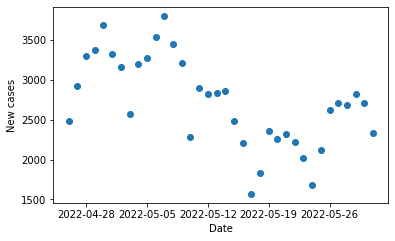

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import scipy
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr,t

df = pd.read_csv('covid_data.csv')

cases=df[["Date_reported","Country","New_cases"]]

cases=cases.loc[cases['Country']== 'India']

date=cases.loc[(cases['Date_reported'] > '2022-04-25')& (cases['Date_reported'] < '2022-06-01')]


cmp=range(0,36)
cmp1=range(0,468)
date['index']=cmp

X1= date.iloc[:,3].values.reshape(-1,1)
X= date.iloc[:,0]
Y= date.iloc[:,2].values.reshape(-1,1)

x=X1.flatten()


current_figure = plt.gcf()
current_figure.autofmt_xdate()
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X1, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X1)

cor,corp= scipy.stats.pearsonr(x, Y)
print('correlation',cor,corp)
m = X1.mean() 
s = X1.std() 
df = len(X1)-1 
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,df))
print("t =",t_crit)
print("df =",df)
print("confidence of 95%",(m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.scatter(X,Y)
plt.xlabel("Date")
plt.ylabel("New cases")
slope_intercept = np.polyfit(x,Y_pred,1)
print(slope_intercept)
plt.show()

